In [8]:
# ✅ Install and import required libraries
!pip install nltk scikit-learn wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk, re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# ✅ Load Dataset (UCI SMS Spam Collection)
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1','v2']]
df.columns = ['label','message']
df['label_num'] = df.label.map({'ham':0,'spam':1})
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


label
ham      71.663627
spam    139.314592
Name: msg_length, dtype: float64


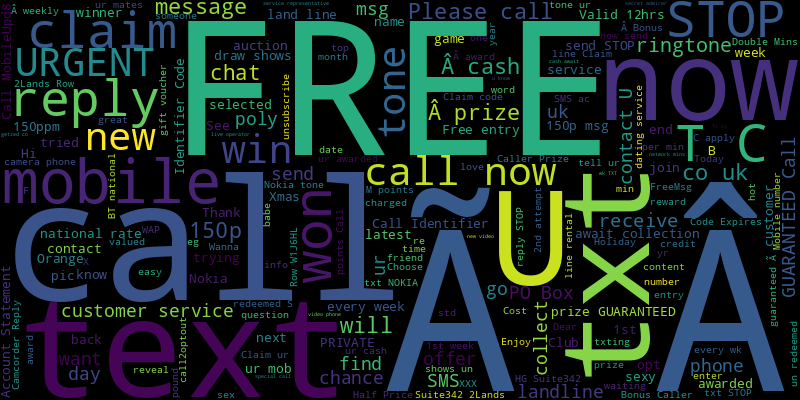

In [9]:
# Q1. What features indicate spam?

df['msg_length'] = df['message'].apply(len)
print(df.groupby('label')['msg_length'].mean())

spam_words = " ".join(df[df.label=='spam']['message'])
WordCloud(width=800, height=400).generate(spam_words).to_image()


In [10]:
# Q2. How to clean and tokenize text?

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    tokens = nltk.word_tokenize(text.lower())
    tokens = [ps.stem(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['cleaned'] = df['message'].apply(clean_text)
df[['message','cleaned']].head()


,message,cleaned
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [11]:
# Q3. What is TF-IDF?

tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['cleaned'])
y = df['label_num']
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (5572, 2000)


In [12]:
# Q4. What is precision vs recall?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Precision: 1.0
Recall: 0.7785234899328859


In [13]:
# Q5. How to handle class imbalance?

model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_balanced.fit(X_train, y_train)
print("Balanced Accuracy:", model_balanced.score(X_test, y_test))


Balanced Accuracy: 0.97847533632287


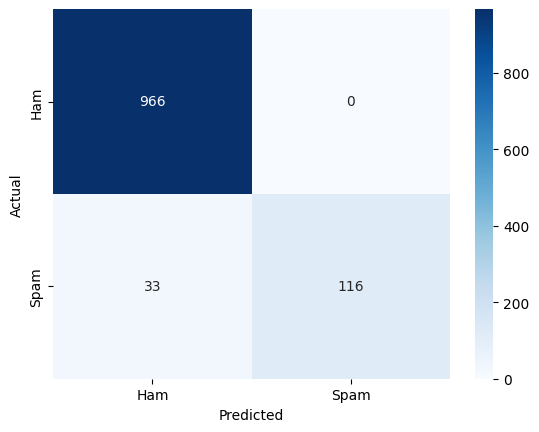

In [14]:
# Q. 6. What is confusion matrix?

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
# Q7. How to improve accuracy?

tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), max_features=3000)
X_ngram = tfidf_ngram.fit_transform(df['cleaned'])

X_train, X_test, y_train, y_test = train_test_split(X_ngram, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
print("Accuracy with bigrams:", model.score(X_test, y_test))


Accuracy with bigrams: 0.9713004484304932


In [35]:
# Q8. What are false positives?

# Get the indices of the test set
test_indices = y_test.index

# Use the boolean mask on the original dataframe, filtered by test indices
false_positives = df.loc[test_indices][(y_test == 0) & (y_pred == 1)].head()
false_positives[['message','label']]

,message,label


In [34]:
# Q9. How does logistic regression work?
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Weights shape:", model.coef_.shape)
print("Bias:", model.intercept_)
print("Formula: sigmoid(w·x + b)")

Weights shape: (1, 3000)
Bias: [-2.61608981]
Formula: sigmoid(w·x + b)


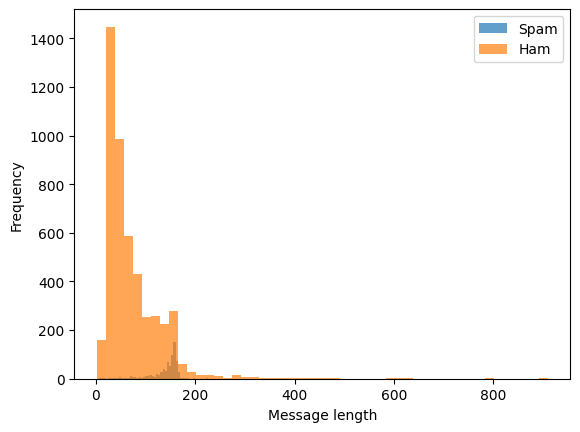

In [33]:
# Q10. How to visualize spam patterns?

spam_lengths = df[df.label=='spam']['msg_length']
ham_lengths = df[df.label=='ham']['msg_length']

plt.hist(spam_lengths, bins=50, alpha=0.7, label="Spam")
plt.hist(ham_lengths, bins=50, alpha=0.7, label="Ham")
plt.legend()
plt.xlabel("Message length")
plt.ylabel("Frequency")
plt.show()


In [32]:
# Q11. What is tokenization and why is it important?

text = "You WON a free lottery ticket!!!"
print("Tokens:", nltk.word_tokenize(text))


Tokens: ['You', 'WON', 'a', 'free', 'lottery', 'ticket', '!', '!', '!']


In [31]:
# Q12. How does stemming differ from lemmatization?

lemmatizer = WordNetLemmatizer()
print("Stemming:", ps.stem("running"))
print("Lemmatization:", lemmatizer.lemmatize("running", 'v'))


Stemming: run
Lemmatization: run


In [30]:
# Q13. Why use Logistic Regression instead of Naïve Bayes?

nb = MultinomialNB()
nb.fit(X_train, y_train)

print("Logistic Regression Accuracy:", model.score(X_test, y_test))
print("Naive Bayes Accuracy:", nb.score(X_test, y_test))


Logistic Regression Accuracy: 0.9713004484304932
Naive Bayes Accuracy: 0.9811659192825112


In [29]:
# Q14. What evaluation metrics are better than accuracy in spam detection?

print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

F1 Score: 0.8754716981132076


In [28]:
# Q15. How do n-grams help in detecting spam phrases?

cv = CountVectorizer(ngram_range=(2,2))
X_ngrams = cv.fit_transform(df['cleaned'])
print("Sample bigrams:", list(cv.vocabulary_.keys())[:10])


Sample bigrams: ['go jurong', 'jurong point', 'point crazi', 'crazi avail', 'avail bugi', 'bugi great', 'great world', 'world la', 'la buffet', 'buffet cine']
